In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Features engieneering

In [2]:
users = pd.read_csv('../data/train_users_2.csv')
test_users = pd.read_csv('../data/test_users.csv')
sessions = pd.read_csv('../data/sessions.csv')
# ages = pd.read_csv('../data/age_gender_bkts.csv')
# countries = pd.read_csv('../data/countries.csv')
user_ids = set(sessions.user_id.values).intersection(users.id.values)

In [3]:
from datetime import datetime

def days_between(d1, d2, t1="%Y-%m-%d", t2="%Y-%m-%d"):
    d1 = datetime.strptime(d1, t1)
    d2 = datetime.strptime(d2, t2)
    return abs((d2 - d1).days)

In [4]:
users['month_account_created'] = users.apply(lambda r: int(r['date_account_created'].split('-')[1]), axis=1)

In [5]:
users['target'] = users.apply(lambda r: 1 if r['country_destination'] != 'NDF' else 0, axis=1)

In [6]:
data = pd.concat([users[users['target'] == 1].head(88000), users[users['target'] == 0].head(88000)])
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,month_account_created,target
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,9,1
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,12,1
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,9,1
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,1,1
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154116,6mvrjolxfk,2014-02-18,20140218055331,NaN,-unknown-,NaN,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,NDF,2,0
154118,acdq94b5oo,2014-02-18,20140218055604,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,iPad,Chrome Mobile,NDF,2,0
154119,pcqkta8etp,2014-02-18,20140218055939,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,2,0
154121,ykxgog2ws0,2014-02-18,20140218060032,NaN,MALE,29.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2,0


In [7]:
data['null_age'] = data['age'].isnull().astype(int)
data['age_correct'] = ((0 < data['age']) & (data['age'] < 100)).astype(int)
data['age_100'] = ((100 < data['age']) & (data['age'] < 2000)).astype(int)

In [8]:
data['gender_unknown'] = (data['gender'] == '-unknown-').astype(int)

In [9]:
data['aff_channel_api'] = (data['affiliate_channel'] == 'api').astype(int)
data['aff_channel_content'] = (data['affiliate_channel'] == 'content').astype(int)
data['aff_channel_other'] = (data['affiliate_channel'] == 'other').astype(int)

In [10]:
data['first_dev_type_mac'] = (data['first_device_type'] == 'Mac').astype(int)
data['first_dev_type_unknown'] = (data['first_device_type'] == 'Other/Unknown').astype(int)
# data['first_dev_type_phone'] = ((data['first_device_type'] == 'Android Phone') | (data['first_device_type'] == 'iPhone')).astype(int)

In [11]:
data['created_account_spring'] = ((3 <= data['month_account_created']) & (data['month_account_created'] <= 6)).astype(int)
data['created_account_cold'] = ((7 <= data['month_account_created']) | (data['month_account_created'] <= 1)).astype(int)

In [12]:
data['signup_method_facebook'] = (data['signup_method'] == 'facebook').astype(int)

In [13]:
data['has_session'] = data.apply(lambda r: 1 if r['id'] in user_ids else 0, axis=1)

In [14]:
data['signup_flow_start'] = (data['signup_flow'] <= 1).astype(int)
data['signup_flow_middle'] = ((20 > data['signup_flow']) & (data['signup_flow'] > 1)).astype(int)
data['signup_flow_end'] = (data['signup_flow'] >= 20).astype(int)

In [15]:
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,aff_channel_other,first_dev_type_mac,first_dev_type_unknown,created_account_spring,created_account_cold,signup_method_facebook,has_session,signup_flow_start,signup_flow_middle,signup_flow_end
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,0,0,0,0,1,0,0,0,1,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,0,0,0,0,1,1,0,1,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,0,0,0,0,1,0,0,1,0,0
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,...,1,0,0,0,1,0,0,1,0,0
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154116,6mvrjolxfk,2014-02-18,20140218055331,NaN,-unknown-,NaN,basic,0,en,direct,...,0,0,0,0,0,0,1,1,0,0
154118,acdq94b5oo,2014-02-18,20140218055604,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,...,0,0,0,0,0,0,1,1,0,0
154119,pcqkta8etp,2014-02-18,20140218055939,NaN,-unknown-,NaN,basic,25,en,direct,...,0,0,0,0,0,0,0,0,0,1
154121,ykxgog2ws0,2014-02-18,20140218060032,NaN,MALE,29.0,basic,0,en,direct,...,0,0,0,0,0,0,1,1,0,0


In [16]:
data = data.sample(frac=1)

In [17]:
n = int(data.shape[0] * 0.7)
matrix_data = data.loc[:, 'null_age':].values

X_train = matrix_data[:n, :]
y_train = data['target'].values[:n]

X_test = matrix_data[n:, :]
y_test = data['target'].values[n:]

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.695043654476241

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=99, max_depth=11)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7225241946175261

In [20]:
# models = [RandomForestClassifier(n_estimators=99, max_depth=2*i+1 + 6).fit(X_train, y_train) for i in range(8)]
# scores = [model.score(X_test, y_test) for model in models]

In [21]:
# xs = [2*i+1 +6 for i in range(8)]
# plt.plot(xs, scores)
# scores

In [22]:
model.feature_importances_

array([0.15251075, 0.14586959, 0.0049825 , 0.05286699, 0.01346984,
       0.01900733, 0.00711829, 0.        , 0.02649032, 0.12345914,
       0.05980718, 0.11654939, 0.2359756 , 0.01206296, 0.01860855,
       0.01122157])

In [35]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth= 10, learning_rate=1, n_estimators=5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7224105604060529

In [24]:
pd.crosstab(data['has_session'], data['target'])

target,0,1
has_session,,
0,78339,60133
1,9661,27867


## Where does my models get errors ?

In [25]:
pred = model.predict(X_test)

In [26]:
df = data.tail(data.shape[0] - n).copy().reset_index()

In [27]:
df['prediction'] = pred
df

,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,first_dev_type_mac,first_dev_type_unknown,created_account_spring,created_account_cold,signup_method_facebook,has_session,signup_flow_start,signup_flow_middle,signup_flow_end,prediction
0,150744,k1nbot8jn9,2014-02-08,20140208204922,NaN,-unknown-,NaN,basic,25,en,...,0,0,0,0,0,0,0,0,1,0
1,118077,39mbo7r9e5,2013-10-19,20131019210150,NaN,-unknown-,62.0,basic,0,en,...,0,0,0,1,0,0,1,0,0,1
2,104850,qdicydf50f,2013-09-04,20130904070613,2013-09-21,-unknown-,41.0,basic,0,en,...,0,0,0,1,0,0,1,0,0,1
3,172569,uk1cvt8b19,2014-04-07,20140407024415,2014-04-07,-unknown-,NaN,google,12,en,...,0,1,1,0,0,1,0,1,0,1
4,47134,hamzws5scz,2012-11-03,20121103024858,NaN,FEMALE,24.0,facebook,0,en,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52796,54784,bqttrf2d0d,2013-01-06,20130106193614,NaN,-unknown-,NaN,basic,0,en,...,0,0,0,1,0,0,1,0,0,0
52797,85859,fbpf6t2e2d,2013-06-23,20130623093739,2013-06-25,-unknown-,31.0,facebook,12,en,...,0,0,1,0,1,0,0,1,0,1
52798,124891,kr5lw0xf2d,2013-11-15,20131115232425,2013-11-24,MALE,26.0,facebook,0,en,...,0,0,0,1,1,0,1,0,0,0
52799,26562,rbvvbbatcn,2012-06-05,20120605020408,2012-07-03,MALE,28.0,basic,0,en,...,0,0,1,0,0,0,1,0,0,1


In [28]:
errors = df[df['prediction'] != df['target']].copy().reset_index()
errors.loc[:,:'target']

,level_0,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,month_account_created,target
0,1,118077,39mbo7r9e5,2013-10-19,20131019210150,NaN,-unknown-,62.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NDF,10,0
1,10,30507,s2enc5jyll,2012-07-05,20120705012849,2012-07-26,MALE,34.0,facebook,12,en,api,other,linked,Web,Mac Desktop,Safari,IT,7,1
2,15,136040,6kwt7jidwt,2013-12-28,20131228195152,NaN,MALE,40.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,12,0
3,17,111956,v63v85tc75,2013-09-27,20130927151352,NaN,FEMALE,64.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,NDF,9,0
4,21,87676,qc4qzzi7v5,2013-07-01,20130701051517,2013-07-01,MALE,31.0,facebook,0,en,direct,direct,linked,Web,Windows Desktop,IE,other,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14643,52786,134071,l9gql30j92,2013-12-20,20131220194727,NaN,FEMALE,26.0,basic,24,en,sem-non-brand,google,untracked,Moweb,Windows Desktop,Firefox,NDF,12,0
14644,52787,108712,odrnc1q2lq,2013-09-18,20130918153519,2013-09-18,FEMALE,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,AOL Explorer,CA,9,1
14645,52791,7999,c2zi78wefy,2011-08-21,20110821032940,2011-08-23,MALE,38.0,facebook,0,en,direct,direct,untracked,Web,iPhone,-unknown-,US,8,1
14646,52795,31461,23rn4ta67l,2012-07-11,20120711181844,NaN,FEMALE,65.0,facebook,3,en,direct,direct,linked,Web,Mac Desktop,Safari,NDF,7,0


In [29]:
errors.columns

Index(['level_0', 'index', 'id', 'date_account_created',
       'timestamp_first_active', 'date_first_booking', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'month_account_created', 'target', 'null_age', 'age_correct', 'age_100',
       'gender_unknown', 'aff_channel_api', 'aff_channel_content',
       'aff_channel_other', 'first_dev_type_mac', 'first_dev_type_unknown',
       'created_account_spring', 'created_account_cold',
       'signup_method_facebook', 'has_session', 'signup_flow_start',
       'signup_flow_middle', 'signup_flow_end', 'prediction'],
      dtype='object')

(14648, 37)

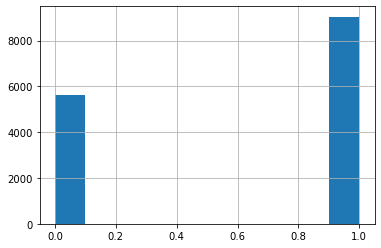

In [30]:
errors['target'].hist()
errors.shape

In [31]:
balanced_errors_df = errors[errors['target'] == 1].head(min(errors[errors['target'] == 1].shape[0], errors[errors['target'] == 0].shape[0]))
balanced_errors_ndf = errors[errors['target'] == 0].head(min(errors[errors['target'] == 1].shape[0], errors[errors['target'] == 0].shape[0]))
balanced_errors = pd.concat([balanced_errors_df, balanced_errors_ndf]).sample(frac=1).drop(['level_0', 'index'], axis=1).reset_index()

target,0,1
has_session,,
0,4914,5102
1,694,506


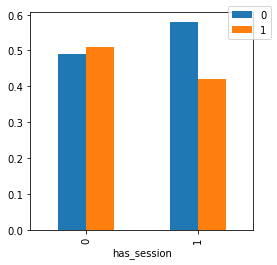

In [32]:
tmp = pd.crosstab(balanced_errors['has_session'], balanced_errors['target'])
tmp.div(tmp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.legend(bbox_to_anchor=(1.1, 1.05))
tmp

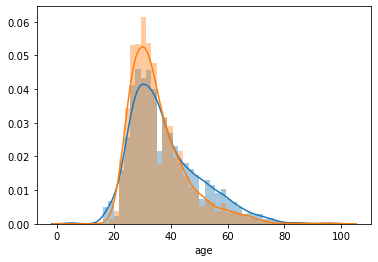

In [33]:
sns.distplot(balanced_errors[(balanced_errors['age'] < 100) & (balanced_errors['target'] == 0)]['age'])
sns.distplot(balanced_errors[(balanced_errors['age'] < 100) & (balanced_errors['target'] == 1)]['age'])